# Spark Funds - EDA Assignment 
## Name : <font color='Green'>Sameer Gadicherla</font>      Batch : <font color='Green'> 31st March 2021 </font>

## 1. Data Cleaning

### Loading the datasets

In [156]:
## import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

In [157]:
# load the datasets into two different dataframes
companies = pd.read_csv("Data/companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("Data/rounds2.csv", encoding = "ISO-8859-1")

In [158]:
# print the heads to see how the data looks
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [159]:
companies.shape

(66368, 10)

In [160]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [161]:
# getting number of unique companies in companies df
companies.describe()
# There are 66368 unique permalinks as seen below

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Stormgeo,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [162]:
# getting number of unique companies in rounds2 df
rounds2.company_permalink.describe()
# There are 90247 unique permalinks out of 114949 as seen below

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [163]:
# lowercase the permalinks so that its standardised accross the two dataframes
companies.permalink = companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [164]:
# checking the number of companies which are present in rounds but not in companies df
not_present = rounds2[~rounds2.company_permalink.isin(companies.permalink)]

In [165]:
not_present
# we see that there are seven such companies
#looks like the permalinks have special characters

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [166]:
## lets rename the company_permalink field in rounds2 df to permalink so that we can merge both the dataframes on this column

rounds2 = rounds2.rename(columns = {"company_permalink": "permalink"})

In [167]:
## lets check the shape of rounds2 before we add extra companies from companies df
rounds2.shape

(114949, 6)

In [168]:
rounds2

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [212]:
master_frame = companies.merge(rounds2,how="inner",on="permalink")

In [213]:
org_shape = master_frame.shape
org_shape

(114942, 15)

In [214]:
100 * (master_frame.isnull().sum()/master_frame.shape[0])

permalink                   0.000000
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
dtype: float64

### The reason why we chose permalink as unique is because we can see 0% null values.
### We cannot use <font color = "pink">name</font> as unique key ,because it has missing values

In [215]:
## Let us drop the columns which we dont plan working with 
master_frame = master_frame.drop(columns =["funding_round_code","funding_round_permalink","funded_at","founded_at","city","region","state_code","status","homepage_url","name"])
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.0


In [216]:
## lets print the missing values count again
master_frame.isnull().sum()/master_frame.shape[0]

permalink             0.000000
category_list         0.029641
country_code          0.075438
funding_round_type    0.000000
raised_amount_usd     0.173862
dtype: float64

In [217]:
## funded amount column has around 17.3% missing values.
master_frame[master_frame.raised_amount_usd.isnull()].shape

(19984, 5)

#### We see that there are around ~20K values missing for the funded amount. Let's drop them 

In [218]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [219]:
master_frame.isnull().sum()/master_frame.shape[0]

permalink             0.000000
category_list         0.010994
country_code          0.061606
funding_round_type    0.000000
raised_amount_usd     0.000000
dtype: float64

In [220]:
### Around 6% of records do not have country code. Country code is important for us as we are looking for investing in countries
print(master_frame[master_frame.country_code.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.country_code.isnull()]

(5850, 5)


In [221]:
## since we are focussing on which sector to invest in as well, these below missing records need to be dropped
print(master_frame[master_frame.category_list.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.category_list.isnull()]

(579, 5)


### We want to focus only on the main four types of Funding:
### Venture - Seed - Angel - Private Equity

In [228]:
### Lets Drop all the Other Rows which dont fall in the above funding types
master_frame = master_frame[master_frame.funding_round_type.isin(["venture","seed","private_equity","angel"])]

In [229]:
## printing the master_frame shape again
refined_shape = master_frame.shape
refined_shape

(75124, 5)

In [230]:
### Total records dropped
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])

Total Records Dropped:  39818
Percentage of Records Dropped:  34.64181935236902


In [231]:
## lets make sure we have dropped all the missing data
master_frame.isnull().sum()/master_frame.shape[0]

permalink             0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [232]:
### Lets get the most representative values of each funding type
master_frame.groupby("funding_round_type")["raised_amount_usd"].median()

funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

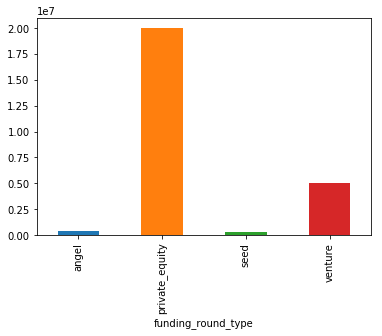

In [238]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median().plot.bar()

In [233]:
master_frame.groupby("funding_round_type")["funding_round_type"].count()

funding_round_type
angel              4400
private_equity     1820
seed              21095
venture           47809
Name: funding_round_type, dtype: int64

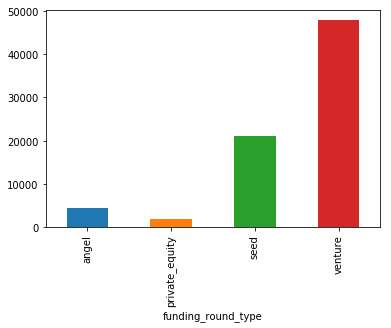

In [234]:
master_frame.groupby("funding_round_type")["funding_round_type"].count().plot.bar()

## Observations:
### - we see above that most of the investments are happening in the venture level funding 
### - It falls in the range of budget provided by spark funds as well
### - It's median value is 5M

In [239]:
## Let's remove records which aren't of venture type funding
master_frame = master_frame[master_frame.funding_round_type == "venture"]

In [240]:
master_frame.shape

(47809, 5)

## Country Analysis
### Investing in Countries where most other countries have invested

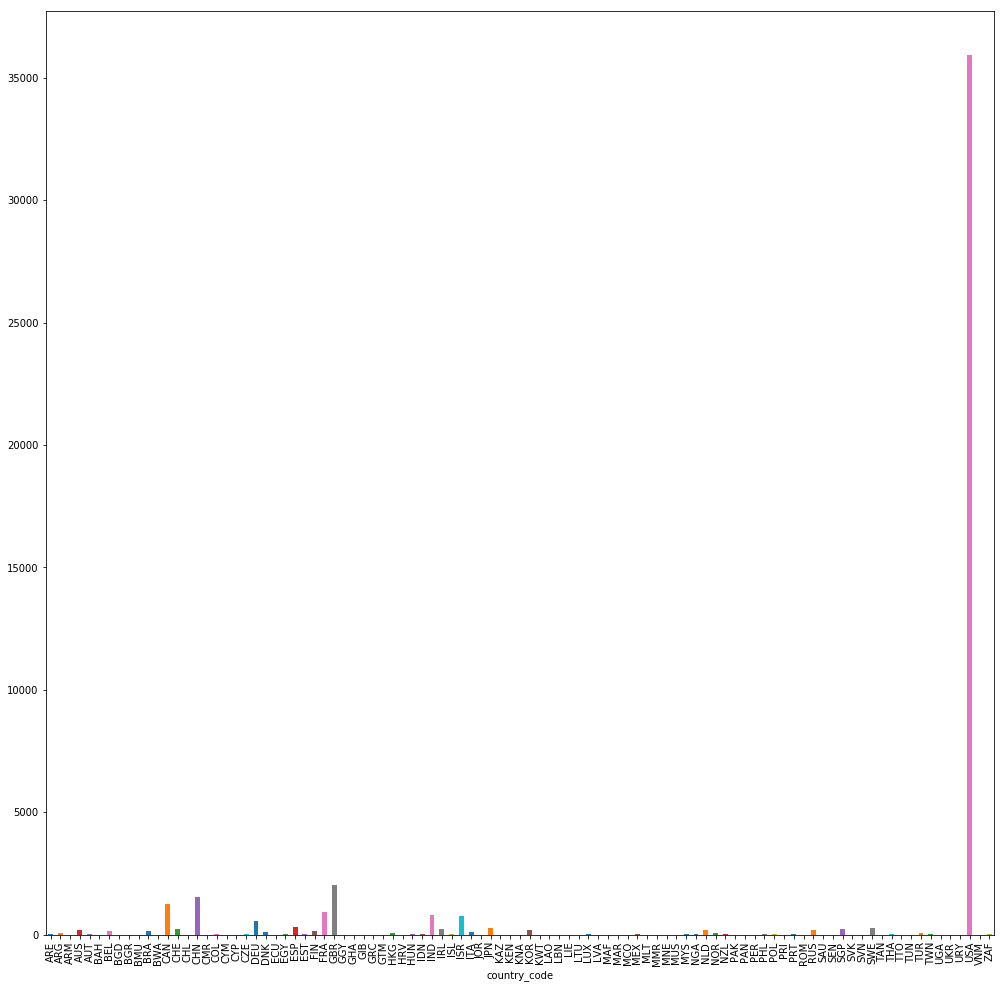

In [241]:
## let's check which country has most investment count
plt.figure(figsize = (17,17))
master_frame.groupby("country_code")["country_code"].count().plot.bar()

In [242]:
temp_df = pd.DataFrame({})
temp_df["Funding"] = master_frame.groupby("country_code")["raised_amount_usd"].sum()
temp_df = temp_df.sort_values("Funding",ascending= False)

#printing the top 9 countries based on the highest funding in all rounds - SUM
top9 = temp_df.iloc[0:9]
print(top9)


                   Funding
country_code              
USA           4.200680e+11
CHN           3.933892e+10
GBR           2.007281e+10
IND           1.426151e+10
CAN           9.482218e+09
FRA           7.226851e+09
ISR           6.854350e+09
DEU           6.306922e+09
JPN           3.167647e+09


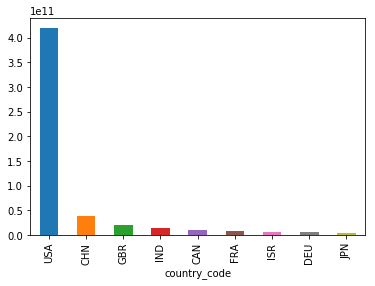

In [243]:
### lets see how they look when plotted on based of sum of the funding
top9.Funding.plot.bar()

## Observations
### <ol><li> USA , GBR , IND are the top three English Speaking countries after checking the wiki page </li> <li> CHN isn't an English Speaking Country according to the wiki page </li></ol>

## Sector Analysis - 1

In [244]:
# lets load the mapping csv into a df
mapping = pd.read_csv("../EDA_SparkFunds/Data/mapping.csv")

In [245]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [246]:
## Column check: Blank is a column is which can be dropped(optional) and is used only for the first row which is empty
mapping.Blanks.sum()

1

In [306]:
x = mapping[mapping.category_list == str("Accounting")].iloc[0]
x[x == 1].axes[0][0]

'Social, Finance, Analytics, Advertising'

In [312]:
### write a function which takes the category name as the parameter and gives the main sector as the answer
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        ## We see that there are few primary sectors/categories which do not fall into any of the main sectors, lets 
        ## keep them them into Others
        return None
get_main_sector("3D")

'Manufacturing'

In [313]:
## create a derived column for primary sector by using the name before '|'
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x: str(x).split("|")[0])

In [314]:
## main_sector column using primary sector
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [315]:
### records with no main_sector mapping
no_main_sector = master_frame[master_frame.main_sector.isnull()]
no_main_sector

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
10,/organization/0xdata,Analytics,USA,venture,20000000.0,Analytics,None
11,/organization/0xdata,Analytics,USA,venture,1700000.0,Analytics,None
12,/organization/0xdata,Analytics,USA,venture,8900000.0,Analytics,None
61,/organization/100plus,Analytics,USA,venture,500000.0,Analytics,None
148,/organization/19pay,Finance|FinTech,CHN,venture,6230000.0,Finance,None
198,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,2500000.0,Analytics,None
199,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,500000.0,Analytics,None
200,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,1000000.0,Analytics,None
256,/organization/24-7-card,Finance,USA,venture,3452941.0,Finance,None
713,/organization/51credit-com,Finance,CHN,venture,10000000.0,Finance,None


In [316]:
## the following primary sectors do not have a mapping (3117 entries)
no_main_sector.groupby("primary_sector")["primary_sector"].count().to_frame().sort_values("primary_sector",ascending=False)

C:\Users\Sameer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'primary_sector' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,primary_sector
primary_sector,
Analytics,1496
Finance,742
Nanotechnology,155
Financial Services,131
Big Data Analytics,112
Career Management,71
Cloud Management,47
Event Management,30
Finance Technology,28


In [322]:
## Lets map these missing mappings to the right sectors 
## I will map all the praimry sectors with >= 100 values missing and drop the others

## finetune existing mapping function to map these missing mappings
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        if category == "Analytics" or category == "Finance" or category == "Financial Services" or category == "Big Data Analytics":
            return "Social, Finance, Analytics, Advertising"
        elif category == "Nanotechnology":
            return "Cleantech / Semiconductors"
        else:
            return None    

In [323]:
## replace these missing mappings
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [325]:
#drop all the primary sectors with less than 100 records
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [327]:
## reprint the data cleaned
refined_shape = master_frame.shape
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])


Total Records Dropped:  67614
Percentage of Records Dropped:  58.82445059247272


In [328]:
## investments based on main_sector
master_frame.groupby("main_sector")["main_sector"].count()

main_sector
Automotive & Sports                          735
Cleantech / Semiconductors                 10033
Entertainment                               2698
Health                                      3951
Manufacturing                               3281
News, Search and Messaging                  5903
Others                                     11316
Social, Finance, Analytics, Advertising     9411
Name: main_sector, dtype: int64

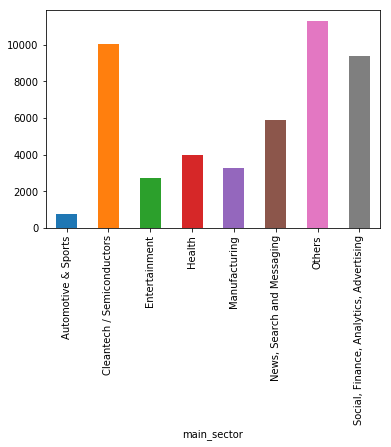

In [329]:
master_frame.groupby("main_sector")["main_sector"].count().plot.bar()

## Observations:
### <ol><li>As of now we see that Others is highly contributed sectors</li><li>CleanTech/Semiconductors is the second highest</li></ol>

## Sector Analysis - 2

In [330]:
## Creating DataFrames per country falling within 5M and 15M brackets
usa = master_frame[(master_frame.country_code == "USA") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
gbr = master_frame[(master_frame.country_code == "GBR") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
ind = master_frame[(master_frame.country_code == "IND") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

In [331]:
### total no of investments in each of these countries
print(usa.shape[0], " investments in USA")
print(gbr.shape[0], "   investments in UK/GBR")
print(ind.shape[0], "   investments in India")

11945  investments in USA
611    investments in UK/GBR
327    investments in India


In [332]:
### total dollars investmented in each of these countries
print(usa.raised_amount_usd.sum(), "dollars invested total in USA")
print(gbr.raised_amount_usd.sum(), "  dollars invested total in UK/GBR")
print(ind.raised_amount_usd.sum(), "  dollars invested total in India")

106710641155.0 dollars invested total in USA
5289424747.0   dollars invested total in UK/GBR
2943543602.0   dollars invested total in India


In [334]:
#sector wise amount raised in USA
usa.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,2.608928e+10
"Social, Finance, Analytics, Advertising",2.330301e+10
Cleantech / Semiconductors,2.160781e+10
"News, Search and Messaging",1.379682e+10
Health,8.200859e+09
Manufacturing,7.258553e+09
Entertainment,5.000213e+09
Automotive & Sports,1.454104e+09


In [335]:
#sector wise count of investments in USA
usa_count = usa.groupby("main_sector")["raised_amount_usd"].count().to_frame()
usa_count = usa_count.rename(columns={"raised_amount_usd":"no of investments"})
usa_count = usa_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
usa_count_top3 = usa_count.iloc[0:3,:]
usa_count_top3

,no of investments
main_sector,
Others,2923
"Social, Finance, Analytics, Advertising",2658
Cleantech / Semiconductors,2347


In [336]:
#sector wise amount raised in UK
gbr.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,1.249124e+09
Cleantech / Semiconductors,1.150755e+09
"Social, Finance, Analytics, Advertising",1.068758e+09
"News, Search and Messaging",6.157462e+08
Entertainment,4.615111e+08
Manufacturing,3.619403e+08
Health,2.145375e+08
Automotive & Sports,1.670516e+08


In [337]:
#sector wise count of investments in UK
gbr_count = gbr.groupby("main_sector")["raised_amount_usd"].count().to_frame()
gbr_count = gbr_count.rename(columns={"raised_amount_usd":"no of investments"})
gbr_count = gbr_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
gbr_count_top3 = gbr_count.iloc[0:3,:]
gbr_count_top3

,no of investments
main_sector,
Others,143
"Social, Finance, Analytics, Advertising",130
Cleantech / Semiconductors,129


In [338]:
#sector wise amount raised in India
ind.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,1.007410e+09
"Social, Finance, Analytics, Advertising",5.505496e+08
"News, Search and Messaging",4.338345e+08
Entertainment,2.808300e+08
Manufacturing,2.009000e+08
Health,1.677400e+08
Cleantech / Semiconductors,1.653800e+08
Automotive & Sports,1.369000e+08


In [339]:
#sector wise count of investments in India
ind_count = ind.groupby("main_sector")["raised_amount_usd"].count().to_frame()
ind_count = ind_count.rename(columns={"raised_amount_usd":"no of investments"})
ind_count = ind_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
ind_count_top3 = ind_count.iloc[0:3,:]
ind_count_top3

,no of investments
main_sector,
Others,109
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


In [340]:
## Country-Sector wise sum of investments
pt = pd.pivot_table(data = pd.concat([usa,gbr,ind],axis=0),index=["country_code","main_sector"],aggfunc=np.sum)
pt

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                           1.670516e+08
             Cleantech / Semiconductors                    1.150755e+09
             Entertainment                                 4.615111e+08
             Health                                        2.145375e+08
             Manufacturing                                 3.619403e+08
             News, Search and Messaging                    6.157462e+08
             Others                                        1.249124e+09
             Social, Finance, Analytics, Advertising       1.068758e+09
IND          Automotive & Sports                           1.369000e+08
             Cleantech / Semiconductors                    1.653800e+08
             Entertainment                                 2.808300e+08
             Health                                        1.677400e+08
             Manufacturing                                 2.009000e+08
             News, Search and Messaging                    4.338345e+08
             Others                                        1.007410e+09
             Social, Finance, Analytics, Advertising       5.505496e+08
USA          Automotive & Sports                           1.454104e+09
             Cleantech / Semiconductors                    2.160781e+10
             Entertainment                                 5.000213e+09
             Health                                        8.200859e+09
             Manufacturing                                 7.258553e+09
             News, Search and Messaging                    1.379682e+10
             Others                                        2.608928e+10
             Social, Finance, Analytics, Advertising       2.330301e+10

In [341]:
#other way of seeing sum
total_sum = pt.groupby("country_code")["raised_amount_usd"].sum()
total_sum = total_sum.to_frame()
total_sum

,raised_amount_usd
country_code,
GBR,5.289425e+09
IND,2.943544e+09
USA,1.067106e+11


In [342]:
pt3 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code","main_sector"],values=["raised_amount_usd"],aggfunc=len)

In [343]:
### clear view of all sectors per country with the respective counts
pt3

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                                   16.0
             Cleantech / Semiconductors                           129.0
             Entertainment                                         54.0
             Health                                                24.0
             Manufacturing                                         42.0
             News, Search and Messaging                            73.0
             Others                                               143.0
             Social, Finance, Analytics, Advertising              130.0
IND          Automotive & Sports                                   13.0
             Cleantech / Semiconductors                            20.0
             Entertainment                                         33.0
             Health                                                19.0
             Manufacturing                                         21.0
             News, Search and Messaging                            52.0
             Others                                               109.0
             Social, Finance, Analytics, Advertising               60.0
USA          Automotive & Sports                                  167.0
             Cleantech / Semiconductors                          2347.0
             Entertainment                                        580.0
             Health                                               908.0
             Manufacturing                                        799.0
             News, Search and Messaging                          1563.0
             Others                                              2923.0
             Social, Finance, Analytics, Advertising             2658.0

In [344]:
##create a pivot table with the counts of each category under a country
pt4 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code"],columns="main_sector",values="raised_amount_usd",aggfunc=len)

In [345]:
pt4

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,16.0,129.0,54.0,24.0,42.0,73.0,143.0,130.0
IND,13.0,20.0,33.0,19.0,21.0,52.0,109.0,60.0
USA,167.0,2347.0,580.0,908.0,799.0,1563.0,2923.0,2658.0


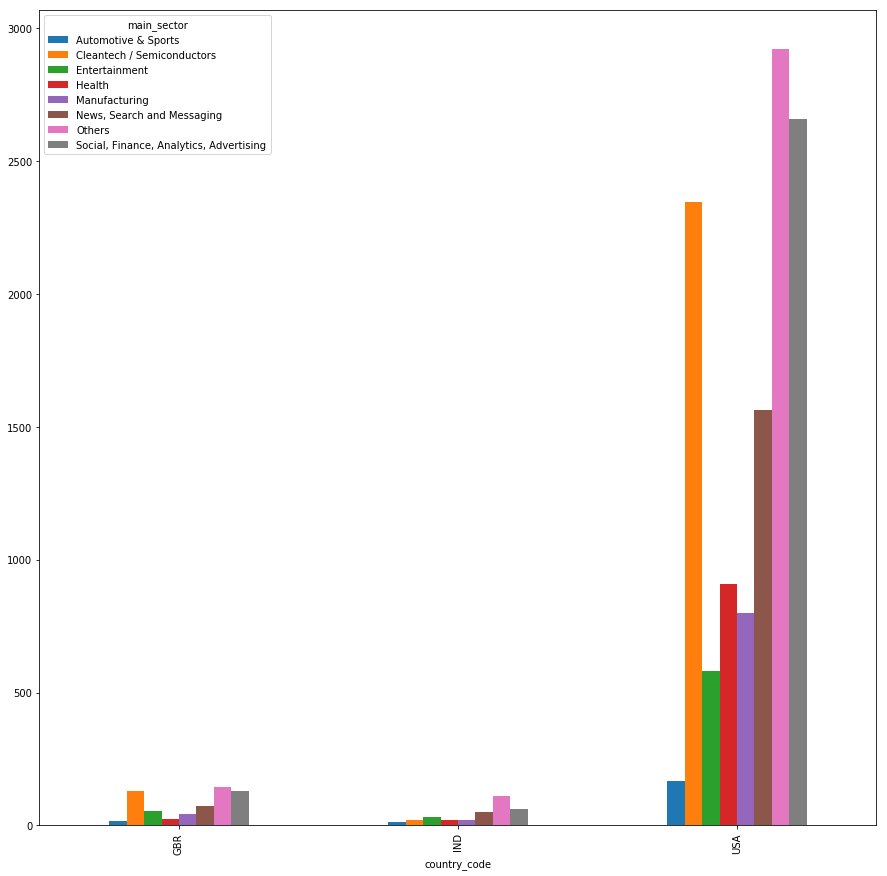

In [346]:
#barplot to see top sectors per country based on count
pt4.plot(kind = "bar" , stacked=False,figsize=(15,15))

In [347]:
# We know that "Others" is the top sector in all the countries

usa_new = usa[usa.main_sector == "Others"]
usa_new.sort_values("raised_amount_usd",ascending = False)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
23305,/organization/convio,Software,USA,venture,15000000.0,Software,Others
9213,/organization/avamar-technologies,Software,USA,venture,15000000.0,Software,Others
32650,/organization/equallogic,Enterprise Software,USA,venture,15000000.0,Enterprise Software,Others
86351,/organization/schoology,Education|Software|Systems,USA,venture,15000000.0,Education,Others
85994,/organization/sauce-labs,Enterprise Software|SaaS|Software|Web Development,USA,venture,15000000.0,Enterprise Software,Others
85652,/organization/sambazon,E-Commerce,USA,venture,15000000.0,E-Commerce,Others
19388,/organization/chloe-isabel,E-Commerce|Fashion|Jewelry|Social Commerce,USA,venture,15000000.0,E-Commerce,Others
8967,/organization/authentium,SaaS|Security,USA,venture,15000000.0,SaaS,Others
8970,/organization/authentix,Security,USA,venture,15000000.0,Security,Others
84168,/organization/ritani,E-Commerce|Jewelry,USA,venture,15000000.0,E-Commerce,Others


In [348]:
gbr_new = gbr[gbr.main_sector == "Others"]
gbr_new.sort_values("raised_amount_usd",ascending = False)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
102680,/organization/tribold,Software,GBR,venture,15000000.0,Software,Others
68634,/organization/notonthehighstreet,E-Commerce,GBR,venture,15000000.0,E-Commerce,Others
32364,/organization/environmentiq,Software,GBR,venture,15000000.0,Software,Others
49818,/organization/ip-access,Software,GBR,venture,15000000.0,Software,Others
9921,/organization/azure-solutions,Software,GBR,venture,15000000.0,Software,Others
87626,/organization/sensage,Security,GBR,venture,15000000.0,Security,Others
89720,/organization/silverrail-technologies,Technology|Transportation|Travel,GBR,venture,15000000.0,Technology,Others
65230,/organization/myoptique-group,E-Commerce,GBR,venture,14656237.0,E-Commerce,Others
104394,/organization/ukash,E-Commerce|Finance|FinTech|P2P Money Transfer|...,GBR,venture,14400000.0,E-Commerce,Others
69577,/organization/ocapo,E-Commerce,GBR,venture,14394888.0,E-Commerce,Others


In [349]:
ind_new = ind[ind.main_sector == "Others"]
ind_new.sort_values("raised_amount_usd",ascending = False)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
56018,/organization/limeroad,E-Commerce|Social Media,IND,venture,15000000.0,E-Commerce,Others
20273,/organization/classteacher-learning-systems,EdTech|Education,IND,venture,15000000.0,EdTech,Others
108740,/organization/voylla-retail-pvt-ltd,E-Commerce,IND,venture,15000000.0,E-Commerce,Others
98504,/organization/tejas-networks-india,Web Hosting,IND,venture,15000000.0,Web Hosting,Others
84698,/organization/roposo,E-Commerce|Fashion,IND,venture,15000000.0,E-Commerce,Others
74348,/organization/pepperfry-com,E-Commerce,IND,venture,15000000.0,E-Commerce,Others
51878,/organization/k-12-techno-services,EdTech|Education,IND,venture,15000000.0,EdTech,Others
50513,/organization/itzcash-card-ltd,Gift Card,IND,venture,15000000.0,Gift Card,Others
49908,/organization/ipolicy-networks,Security,IND,venture,15000000.0,Security,Others
39946,/organization/girnarsoft,Enterprise Software|Mobile Software Tools|Mobi...,IND,venture,15000000.0,Enterprise Software,Others


## Conclusions
### Based on the Counts - 
### - <font color='Green'>Others, CleanTech/SemiConductors and Social-Finance-Analytics-Advertising</font> are Top sectors in <font color='Blue'>USA</font>
### - <font color='Green'>Others, CleanTech/SemiConductors and Social-Finance-Analytics-Advertising</font> are Top sectors in <font color='Blue'>GBR(UK)</font>
### - <font color='Green'>Others, News-Search-Messaging and Entertainment</font> are Top sectors in <font color='Blue'>India</font>